Análise e Reconhecimento de Padrões -  Filipe Antunes Marinho - 10438866
===
<h3> Implementar 4 dos seguintes conjuntos de medidas e testar sobre sinais gerados por autômatos probabilíssimos como os já vistos em aula, incluindo o autômato da Figura 2 do CDT-23:

 - Média, desvio padrão, entropia e evenness do número de bursts, e respectivos tamanhos nos split signals;
 - Média, desvio padrão, entropia e evenness do número de distâncias intersímbolos e respectivos valores nos split signals;
 - Média e desvio padrão das magnitudes do espectro de potência da transformada de Fourier discreta dos split signals (pode usar rotina Para FFT);
 - Média e desvio do grau e coeficiente de aglomeração de grafos dos sinais, obtidos pelo método de visibilidade, que deve ser implementado;
 - Coeficiente alpha do DFA da integral do sinal.<h3>

In [1]:
from P2aux import *

#Automatos usados
A = np.array([[0.9, 0.1],[0.9, 0.1]])
B = np.array([[0.2, 0.8], [0.2, 0.8]])
C = np.array([[0.5, 0.5],[0.5, 0.5]])
D = np.array([[0.9,0.1,0,0,0,0],[0.882,0.098,0.02,0,0,0],[0,0,0.2,0.8,0,0],[0,0,0.194,0.776,0.03,0],[0,0,0,0,0.5,0.5],[0.01,0,0,0,0.495,0.495]])
E = np.array([[0.5,0.5,0,0],[0,0.1,0.9,0],[0,0,0.6,0.4],[0.7,0,0,0.3]]) 


automato_a = New_automato(A,200)
automato_b = New_automato(B,200)
automato_c = New_automato(C,200)
automato_d = New_automato(D,200)
automato_e = New_automato(E,200)

---
## Média, desvio padrão, entropia e evenness do número de bursts, e respectivos tamanhos nos split signals

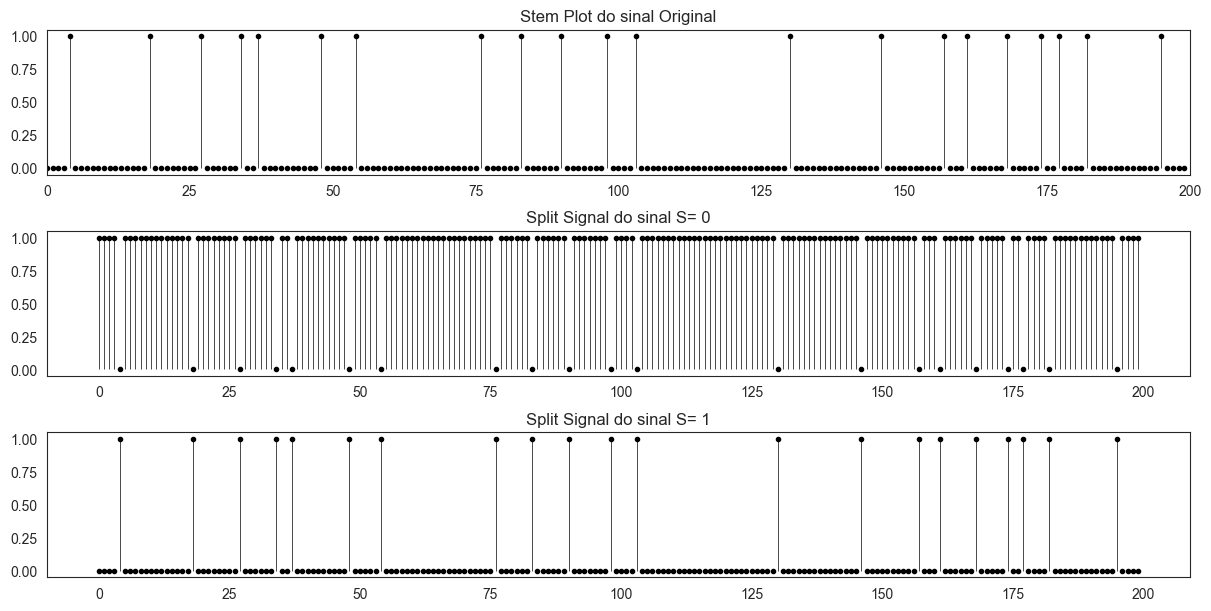

      Média    Desvio  Entropia    Eveness
0  8.333333  6.050056  3.499228  11.307652
1  1.000000  0.000000  0.000000   1.000000


In [7]:
splits_a = Splits_all(automato_a)

means, std, entropy, eveness = [], [], [], []

for split_signal in splits_a:
    means.append(ScanBursts(split_signal).mean())
    std.append(ScanBursts(split_signal).std())
    entropy.append(Entropy(Relative_freq(ScanBursts(split_signal))))
    eveness.append(Evenness(Relative_freq(ScanBursts(split_signal))))
data = {"Média":means, "Desvio": std, "Entropia": entropy, "Eveness":eveness}
print(pd.DataFrame(data))

---
## Média, desvio padrão, entropia e evenness do número de distâncias intersímbolos e respectivos valores nos split signals

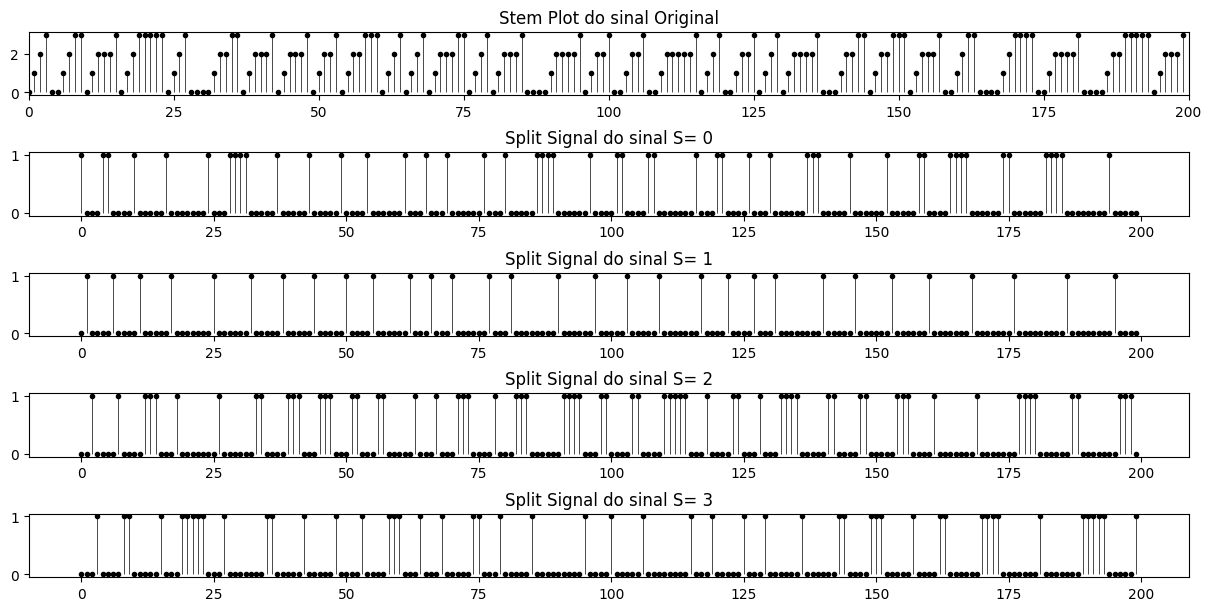

      Média    Desvio  Entropia   Eveness
0  4.800000  1.375984  2.358083  5.126887
1  5.322581  1.785011  2.775945  6.849246
2  4.258065  1.436118  2.241524  4.728963
3  4.806452  1.574379  2.452620  5.474092


In [3]:
splits_e = Splits_all(automato_e)


means, std, entropy, eveness = [], [], [], []
for split_signal in splits_e:
    means.append(Intersymbol(split_signal).mean())
    std.append(Intersymbol(split_signal).std())
    entropy.append(Entropy(Relative_freq(Intersymbol(split_signal))))
    eveness.append(Evenness(Relative_freq(Intersymbol(split_signal))))
data = {"Média":means, "Desvio": std, "Entropia": entropy, "Eveness":eveness}
print(pd.DataFrame(data))

---
## Média e desvio padrão das magnitudes do espectro de potência da transformada de Fourier discreta dos split signals

   Média    Desvio  Entropia   Eveness
0  0.255  0.435861  0.819107  1.764314
1  0.155  0.361905  0.622213  1.539234
2  0.335  0.471990  0.919953  1.892054
3  0.255  0.435861  0.819107  1.764314



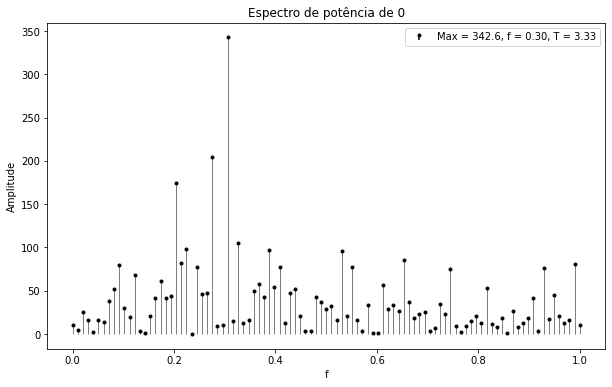

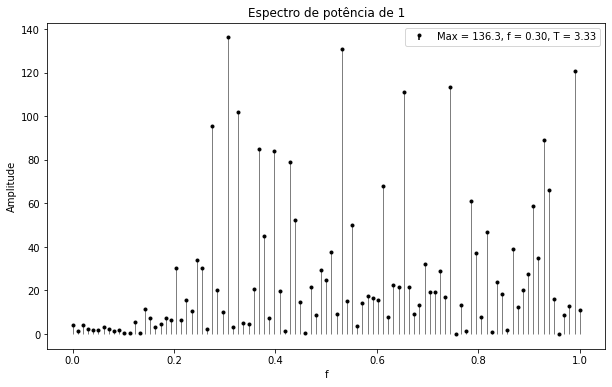

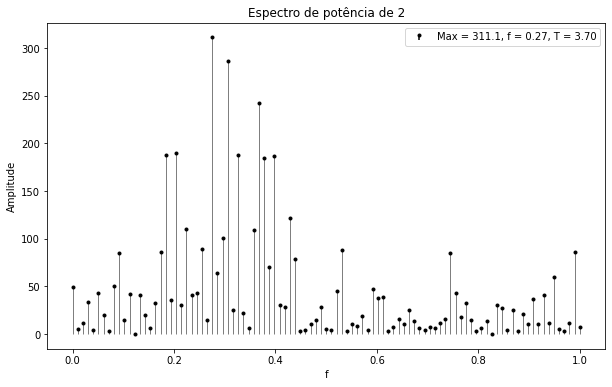

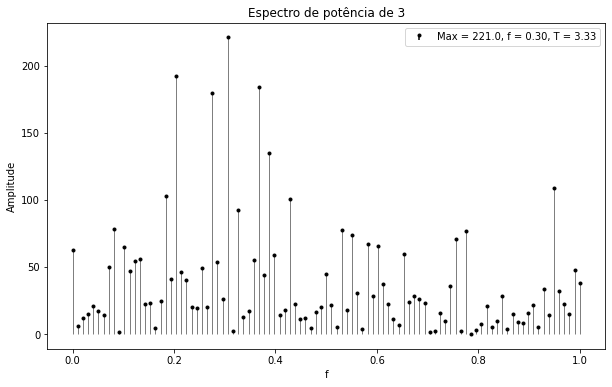

In [4]:
means, std, entropy, eveness, count = [], [], [], [], 0

for split_signal in splits_e:
    p =PowerSpec(split_signal)
    plot_power(p, str(count))
    count+=1
    means.append(split_signal.mean())
    std.append(split_signal.std())
    entropy.append(Entropy(Relative_freq(split_signal)))
    eveness.append(Evenness(Relative_freq(split_signal)))
data = {"Média":means, "Desvio": std, "Entropia": entropy, "Eveness":eveness}
print(pd.DataFrame(data))
print()
plt.legend()
plt.show()

---
## Média e desvio do grau e coeficiente de aglomeração de grafos dos sinais, obtidos pelo método de visibilidade

Grau:
Média: 2.29 Desvio padrão: 0.11 

Coeficiente de aglomeração: 0.02


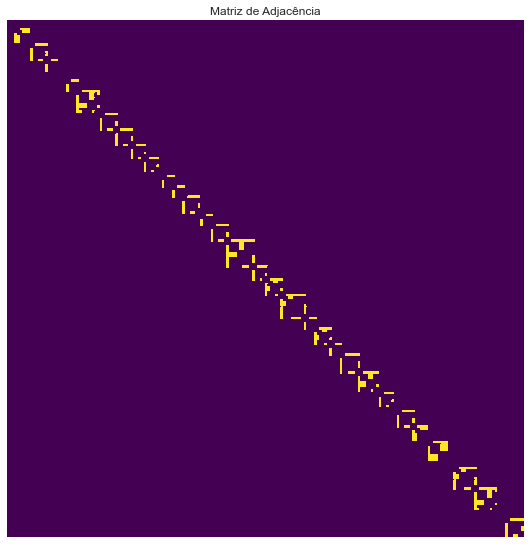

In [5]:
M_e = Visibility(automato_e)

_ = Average_Degree(automato_e, M_e)
_ = Clustering_Coefficient(M_e)